Original shape: (150, 5)
🔎 Dataset Info Before Cleaning
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

Missing Values:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64
------------------------------------------------------------


/tmp/ipython-input-2165461770.py:39: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df[num_cols].hist(ax=axes[0], bins=15, alpha=0.7)


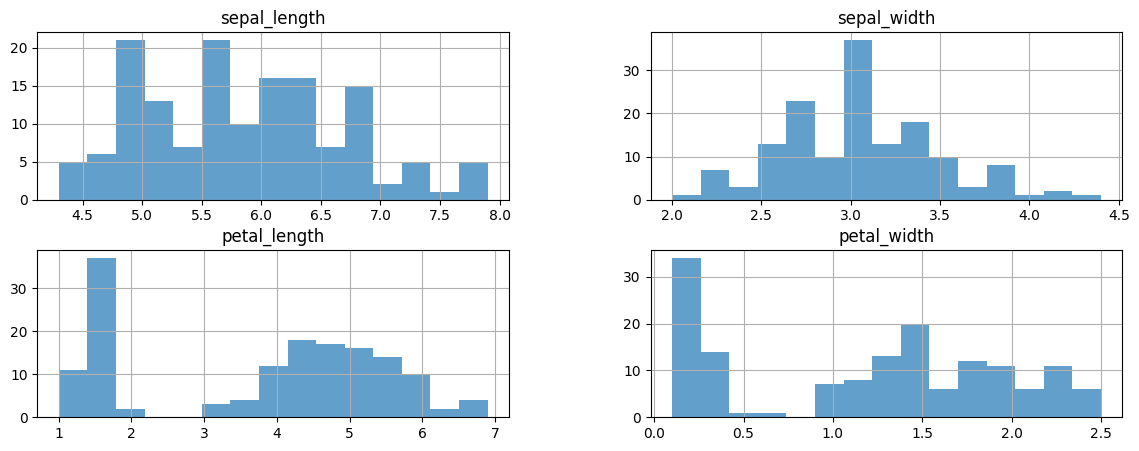

✅ Cleaning Done!

Shape After Cleaning: (146, 5)
------------------------------------------------------------


/tmp/ipython-input-2165461770.py:95: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df[num_cols].hist(ax=axes[0], bins=15, alpha=0.7)


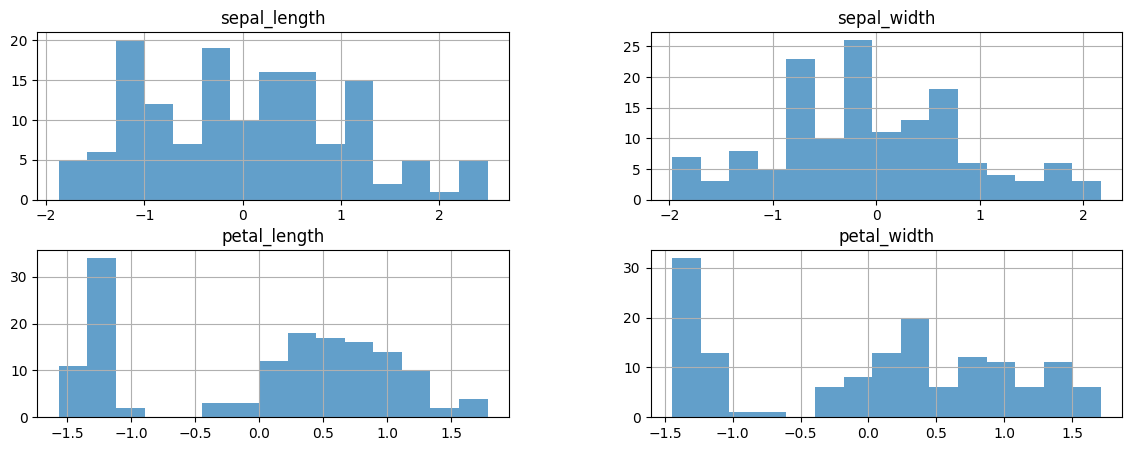


First 5 rows of Cleaned Data:
    sepal_length  sepal_width  petal_length  petal_width  species
0     -0.900681     1.019004     -1.340227    -1.315444        0
1     -1.143017    -0.131979     -1.340227    -1.315444        0
2     -1.385353     0.328414     -1.397064    -1.315444        0
3     -1.506521     0.098217     -1.283389    -1.315444        0
4     -1.021849     1.249201     -1.340227    -1.315444        0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

def clean_data(df, categorical_cols=None, num_cols=None, strategy="mean", visualize=True):
    """
    Cleans and preprocesses the dataset with visualization:
    1. Handles missing values
    2. Encodes categorical columns
    3. Standardizes numerical columns
    4. Removes outliers using IQR method
    5. Visualizes distributions & outliers (before & after)

    Parameters:
        df (pd.DataFrame): Input dataset
        categorical_cols (list): List of categorical columns
        num_cols (list): List of numerical columns
        strategy (str): Missing value strategy - 'mean' or 'median'
        visualize (bool): If True, shows plots

    Returns:
        pd.DataFrame: Cleaned dataset
    """

    df = df.copy()  # keep original safe

    print("🔎 Dataset Info Before Cleaning")
    print(df.info())
    print("\nMissing Values:\n", df.isnull().sum())
    print("-"*60)

    # ================================
    # Visualization: Before Cleaning
    # ================================
    if visualize and num_cols:
        fig, axes = plt.subplots(1, 2, figsize=(14,5))
        df[num_cols].hist(ax=axes[0], bins=15, alpha=0.7)
        axes[0].set_title("Histograms Before Cleaning")

        df[num_cols].boxplot(ax=axes[1])
        axes[1].set_title("Boxplots Before Cleaning")
        plt.show()

    # ================================
    # Handle missing values
    # ================================
    if num_cols:
        for col in num_cols:
            if df[col].isnull().sum() > 0:
                if strategy == "mean":
                    df[col] = df[col].fillna(df[col].mean())
                elif strategy == "median":
                    df[col] = df[col].fillna(df[col].median())

    if categorical_cols:
        for col in categorical_cols:
            if df[col].isnull().sum() > 0:
                df[col] = df[col].fillna(df[col].mode()[0])

    # ================================
    # Encode categorical features
    # ================================
    if categorical_cols:
        for col in categorical_cols:
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col])

    # ================================
    # Standardize numerical features
    # ================================
    if num_cols:
        scaler = StandardScaler()
        df[num_cols] = scaler.fit_transform(df[num_cols])

    # ================================
    # Outlier removal (IQR method)
    # ================================
    if num_cols:
        Q1 = df[num_cols].quantile(0.25)
        Q3 = df[num_cols].quantile(0.75)
        IQR = Q3 - Q1
        df = df[~((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

    print("✅ Cleaning Done!")
    print("\nShape After Cleaning:", df.shape)
    print("-"*60)

    # ================================
    # Visualization: After Cleaning
    # ================================
    if visualize and num_cols:
        fig, axes = plt.subplots(1, 2, figsize=(14,5))
        df[num_cols].hist(ax=axes[0], bins=15, alpha=0.7)
        axes[0].set_title("Histograms After Cleaning")

        df[num_cols].boxplot(ax=axes[1])
        axes[1].set_title("Boxplots After Cleaning")
        plt.show()

    return df


# ================================
# Example with Iris dataset
# ================================
import seaborn as sns
iris = sns.load_dataset("iris")

print("Original shape:", iris.shape)

cleaned_iris = clean_data(
    iris,
    categorical_cols=['species'],
    num_cols=['sepal_length','sepal_width','petal_length','petal_width'],
    strategy="mean",
    visualize=True
)

print("\nFirst 5 rows of Cleaned Data:\n", cleaned_iris.head())
